In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [2]:
df = pd.read_csv('Dummy_data.csv')

X = df.drop(['customerid','churn_Yes'], axis = 1)
y = df[['churn_Yes']]

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=19, stratify = y)

In [4]:
print(X_train.shape)
print(y_train.shape)

(4930, 26)
(4930, 1)


In [5]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:
# Balancing the data
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=3, sampling_strategy = 'minority')
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
print(sorted(Counter(y_resampled).items()))

[('churn_Yes', 1)]


In [7]:
print(X_resampled.shape)
print(y_resampled.shape)

(7244, 26)
(7244, 1)


In [8]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_resampled, y_resampled)
predictions = clf.predict(X_test)

print(accuracy_score(y_test, predictions))

0.7288215806909607


C:\Users\krist\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [9]:
score = clf.score(X_test, y_test)
print(score)

prediction_test = clf.predict(X_test)

0.7288215806909607


In [10]:
# Create the Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, prediction_test)

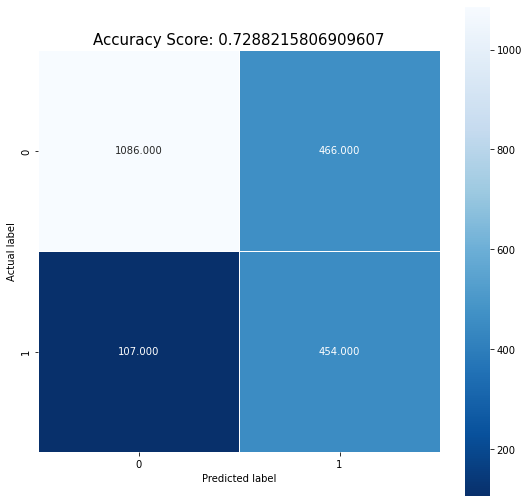

In [11]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [12]:
from sklearn.inspection import permutation_importance

imps = permutation_importance(clf, X_test, y_test)
print(imps.importances_mean)

[-6.53099858e-03 -1.51443445e-03 -2.93421675e-03  9.46521533e-05
  1.79839091e-03 -2.55560814e-03 -1.89304307e-04 -1.89304307e-04
 -2.83956460e-04  3.88073829e-03  1.60908661e-03 -1.89304307e-04
  1.70373876e-03  1.04117369e-03  1.04117369e-03 -2.22044605e-17
  3.50212967e-03  3.50212967e-03  1.94983436e-02 -1.56176053e-02
  3.78608613e-04 -1.32513015e-03  3.59678183e-03 -5.67912920e-04
  3.21817321e-03 -1.98769522e-03]


In [13]:
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))
print(classification_report(y_test,prediction_test))

0.7259634888438133
0.7288215806909607
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1552
           1       0.49      0.81      0.61       561

    accuracy                           0.73      2113
   macro avg       0.70      0.75      0.70      2113
weighted avg       0.80      0.73      0.74      2113



In [14]:
# k-fold cross validation evaluation of xgboost model

from numpy import loadtxt
import xgboost
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score


# CV model
model = GaussianNB()
kfold = StratifiedKFold(n_splits=5)
results = cross_val_score(model, X, y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 74.53% (0.62%)


C:\Users\krist\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\krist\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\krist\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\krist\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r